### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("marketing_campaign.csv")

In [12]:
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeat

Погано прочитало дані, змінюємо розділювач:

In [15]:
df = pd.read_csv("marketing_campaign.csv", delimiter='\t')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

В нас майже немає пропущених значень. Лише 24 рядки колонки "Income". Можна їх, в принципі, видалити і я би швидше схилилась до цього варіанту, щоб не спотворювати дані. Але заповнимо середніми значеннями.

In [17]:
# Заповнення пропущених значень в колонці Income середнім значенням
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Перевіримо, чи є пропущені значення після заповнення
missing_values_after = df.isnull().sum()

# Виводимо результат
print(f"Пропущені значення після заповнення:\n{missing_values_after}")

Пропущені значення після заповнення:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [ ]:
# Обробка категоріальних змінних за допомогою One-Hot Encoding
df = pd.get_dummies(df, columns=['Education', 'Marital_Status', 'Complain'], drop_first=True)

В колонці Dt_Customer міститься дата реєстрації клієнта в компанії. Для кластеризації корисно буде отримати з цієї дати кілька важливих ознак, наприклад:

Рік реєстрації (може допомогти в кластеризації на основі довготривалих клієнтів і нових),

Місяць реєстрації (це може бути важливо для виявлення сезонних трендів),

День тижня реєстрації (може вказувати на поведінкові патерни).

In [26]:
# Обробка дати
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Year'] = df['Dt_Customer'].dt.year
df['Customer_Month'] = df['Dt_Customer'].dt.month
df['Customer_DayOfWeek'] = df['Dt_Customer'].dt.dayofweek + 1  # Додаємо 1, щоб понеділок був 1, а неділя - 7

In [27]:
# Перевірка результату
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Complain_1
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,False,False,False,False,False,True,False,False,False,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,False,False,False,False,False,True,False,False,False,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,False,False,False,False,False,False,True,False,False,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,False,False,False,False,False,False,True,False,False,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,False,True,False,False,True,False,False,False,False,False


In [28]:
# Виведення перших 10 рядків для колонок
df[['Dt_Customer', 'Customer_Year', 'Customer_Month', 'Customer_DayOfWeek']].head(10)

,Dt_Customer,Customer_Year,Customer_Month,Customer_DayOfWeek
0,2012-09-04,2012,9,2
1,2014-03-08,2014,3,6
2,2013-08-21,2013,8,3
3,2014-02-10,2014,2,1
4,2014-01-19,2014,1,7
5,2013-09-09,2013,9,1
6,2012-11-13,2012,11,2
7,2013-05-08,2013,5,3
8,2013-06-06,2013,6,4
9,2014-03-13,2014,3,4


Додамо ще колонку для Recency:
Наприклад, клієнтів можна поділити на групи: " активні" (Recency < 30 днів),

*   "активні" (Recency < 30 днів),
*   "середньоактивні" (30-180 днів),
*   "неактивні" (більше 180 днів).

In [30]:
# Створюємо нову колонку для категоризації клієнтів за активністю
def categorize_recency(recency):
    if recency < 30:
        return 'Active'
    elif 30 <= recency <= 180:
        return 'Middle'
    else:
        return 'Non-active'

# Застосовуємо функцію до колонки Recency
df['Recency_Category'] = df['Recency'].apply(categorize_recency)

# Перевірка результату
df[['Recency', 'Recency_Category']].head()

,Recency,Recency_Category
0,58,Middle
1,38,Middle
2,26,Active
3,26,Active
4,94,Middle


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

Оскільки деякі наші колонки є категоріальними (наприклад, Education, Marital_Status та інші), їх потрібно буде перетворити на числові значення через one-hot encoding, як ми робили раніше.

In [32]:
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Z_CostContact', 'Z_Revenue', 'Response', 'Customer_Year',
       'Customer_Month', 'Customer_DayOfWeek', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Complain_1', 'Recency_Category'],
      dtype='object')

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Вибираємо числові ознаки для кластеризації
numeric_cols = ['Income', 'Year_Birth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Створюємо змінну X з вибраними даними
X = df[numeric_cols]

# Масштабування даних (важливо для KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Створюємо модель кластеризації з 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Обчислюємо силуетну метрику
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])

# Виводимо результат
print(f"Silhouette Score для кластеризації з 3 кластерами: {silhouette_avg}")

Silhouette Score для кластеризації з 3 кластерами: 0.24726258194677098


Для цікавості:

In [37]:
# Створюємо модель кластеризації з 4 кластерами
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans_4.fit_predict(X_scaled)

# Обчислюємо силуетну метрику для 4 кластерів
silhouette_avg_4 = silhouette_score(X_scaled, df['Cluster_4'])

# Виводимо результат
print(f"Silhouette Score для кластеризації з 4 кластерами: {silhouette_avg_4}")

Silhouette Score для кластеризації з 4 кластерами: 0.2195081782067189


In [38]:
# Створюємо модель кластеризації з 5 кластерами
kmeans_4 = KMeans(n_clusters=5, random_state=42)
df['Cluster_5'] = kmeans_4.fit_predict(X_scaled)

# Обчислюємо силуетну метрику для 5 кластерів
silhouette_avg_5 = silhouette_score(X_scaled, df['Cluster_5'])

# Виводимо результат
print(f"Silhouette Score для кластеризації з 5 кластерами: {silhouette_avg_5}")

Silhouette Score для кластеризації з 5 кластерами: 0.12703947211307487


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

Три ознаки для 3D графіка: я виберу Income, Recency, і NumWebPurchases для побудови 3D графіка, оскільки вони дають гарне уявлення про фінансову активність та взаємодію клієнтів з компанією.

In [39]:
import plotly.express as px

# Вибір ознак для візуалізації
df['Income'] = df['Income']
df['Recency'] = df['Recency']
df['NumWebPurchases'] = df['NumWebPurchases']

# Створюємо 3D графік для кластерів
fig = px.scatter_3d(df, x='Income', y='Recency', z='NumWebPurchases',
                    color='Cluster',  # Задаємо колір по кластеру
                    title='3D Visualization of Clusters (Income, Recency, Web Purchases)',
                    labels={'Cluster': 'Cluster', 'Income': 'Income', 'Recency': 'Recency', 'NumWebPurchases': 'Web Purchases'})

# Покажемо графік
fig.show()

Якщо чесно, мало що видно з графіка. Можливо, категорії покупок якось треба об'єднати? Спробуємо інший

In [41]:
# Створюємо 3D графік для кластерів
fig = px.scatter_3d(df, x='Income', y='NumWebPurchases', z='NumStorePurchases',
                    color='Cluster',  # Задаємо колір за кластером
                    title='3D Visualization of Clusters (Income, Web Purchases, Store Purchases)',
                    labels={'Cluster': 'Cluster', 'Income': 'Income', 'NumWebPurchases': 'Web Purchases', 'NumStorePurchases': 'Store Purchases'})

# Покажемо графік
fig.show()

In [42]:
import plotly.express as px

# Створюємо 3D графік для кластерів, використовуючи дохід, покупки в інтернеті та каталозі
fig = px.scatter_3d(df, x='Income', y='NumWebPurchases', z='NumCatalogPurchases',
                    color='Cluster',  # Задаємо колір за кластером
                    title='3D Visualization of Clusters (Income, Web Purchases, Catalog Purchases)',
                    labels={'Cluster': 'Cluster', 'Income': 'Income', 'NumWebPurchases': 'Web Purchases', 'NumCatalogPurchases': 'Catalog Purchases'})

# Покажемо графік
fig.show()

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [47]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Вибір колонок для кластеризації
X = df[['Income', 'Recency', 'NumWebPurchases']]

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Створюємо модель кластеризації з 3 кластерами
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
df['Cluster_Scaled'] = kmeans_scaled.fit_predict(X_scaled)

# Обчислюємо силуетну метрику для масштабованих даних
silhouette_avg_scaled = silhouette_score(X_scaled, df['Cluster_Scaled'])
print(f"Silhouette Score для кластеризації з 3 кластерами (масштабовані дані): {silhouette_avg_scaled}")

# Створення 3D графіка з Plotly
fig = px.scatter_3d(df, x='Income', y='Recency', z='NumWebPurchases',
                    color='Cluster_Scaled',  # Задаємо колір за кластером
                    title='3D Visualization of Clusters (Income, Recency, Web Purchases)',
                    labels={'Cluster_Scaled': 'Cluster', 'Income': 'Income', 'Recency': 'Recency', 'NumWebPurchases': 'Web Purchases'})

# Покажемо графік
fig.show()

Silhouette Score для кластеризації з 3 кластерами (масштабовані дані): 0.3015314404228703


**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [48]:
# Функція для виявлення викидів за допомогою IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Виявлення викидів для кожної з колонок
outliers_income = detect_outliers(df, 'Income')
outliers_recency = detect_outliers(df, 'Recency')
outliers_web_purchases = detect_outliers(df, 'NumWebPurchases')

# Виведемо кількість викидів для кожної колонки
print(f"Викиди в Income: {outliers_income.shape[0]}")
print(f"Викиди в Recency: {outliers_recency.shape[0]}")
print(f"Викиди в NumWebPurchases: {outliers_web_purchases.shape[0]}")

# Видалення рядків з викидами (якщо ви вибрали цей спосіб)
df_cleaned = df[~df.index.isin(outliers_income.index)]
df_cleaned = df_cleaned[~df_cleaned.index.isin(outliers_recency.index)]
df_cleaned = df_cleaned[~df_cleaned.index.isin(outliers_web_purchases.index)]

# Перевірка, чи є викиди в очищених даних
print(f"Кількість рядків після видалення викидів: {df_cleaned.shape[0]}")

Викиди в Income: 8
Викиди в Recency: 0
Викиди в NumWebPurchases: 4
Кількість рядків після видалення викидів: 2228


In [51]:
# Вибір колонок для кластеризації
X = df_cleaned[['Income', 'Recency', 'NumWebPurchases']]

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Створюємо модель кластеризації з 3 кластерами
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster_Scaled'] = kmeans_scaled.fit_predict(X_scaled)

# Обчислюємо силуетну метрику для масштабованих даних
silhouette_avg_scaled = silhouette_score(X_scaled, df_cleaned['Cluster_Scaled'])
print(f"Silhouette Score для кластеризації з 3 кластерами (масштабовані дані): {silhouette_avg_scaled}")

# Створення 3D графіка з Plotly
fig = px.scatter_3d(df_cleaned, x='Income', y='Recency', z='NumWebPurchases',
                    color='Cluster_Scaled',  # Задаємо колір за кластером
                    title='3D Visualization of Clusters (Income, Recency, Web Purchases)',
                    labels={'Cluster_Scaled': 'Cluster', 'Income': 'Income', 'Recency': 'Recency', 'NumWebPurchases': 'Web Purchases'})

# Покажемо графік
fig.show()

Silhouette Score для кластеризації з 3 кластерами (масштабовані дані): 0.32287880027548516


**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

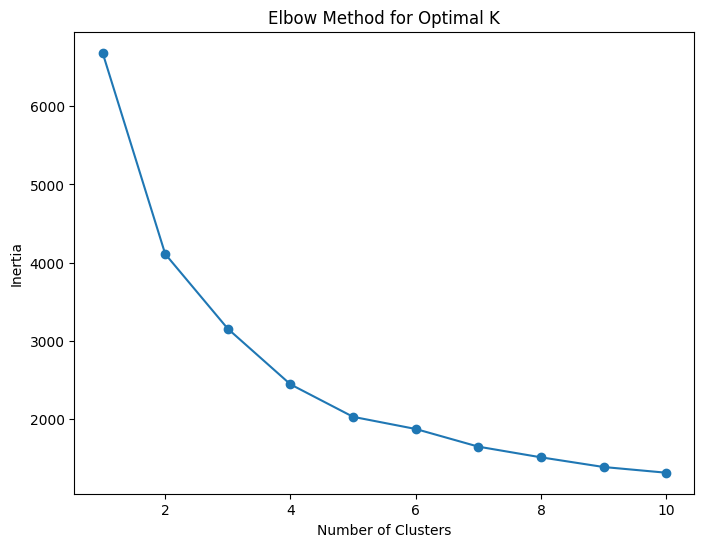

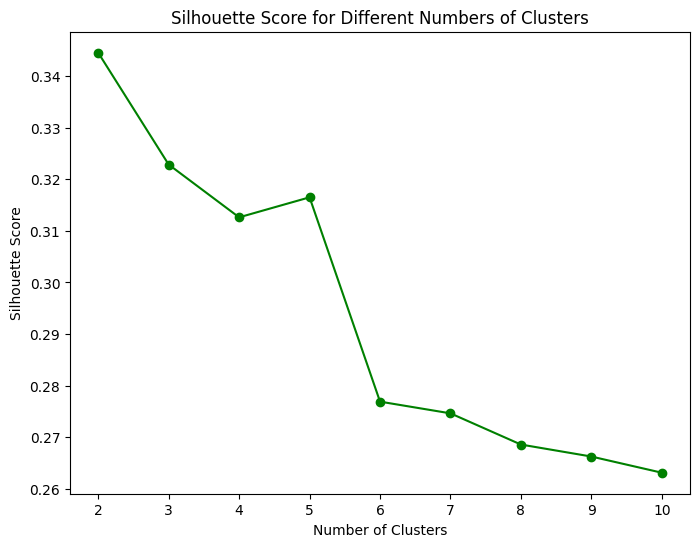

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Вибір колонок для кластеризації на очищених даних
X_cleaned = df_cleaned[['Income', 'Recency', 'NumWebPurchases']]

# Масштабування даних
scaler = StandardScaler()
X_scaled_cleaned = scaler.fit_transform(X_cleaned)

# Визначення оптимальної кількості кластерів за допомогою Elbow Method
inertia = []  # Список для збереження інерції для кожної кількості кластерів
silhouette_scores = []  # Список для збереження силуетної метрики

# Тестуємо від 1 до 10 кластерів
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_cleaned)
    inertia.append(kmeans.inertia_)
    if k > 1:  # Для метрики силуету потрібно більше ніж 1 кластер
        silhouette_scores.append(silhouette_score(X_scaled_cleaned, kmeans.labels_))

# Побудова графіку Elbow Method (інерція по кількості кластерів)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Побудова графіку для силуетної метрики
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

З графіка Elbow Method видно, що оптимальна кількість кластерів — це 3. Це можна визначити, оскільки після 3 кластерів інерція перестала значно знижуватися, що означає, що подальше збільшення кількості кластерів вже не дає значного покращення якості кластеризації.

З графіка Silhouette Score видно, що найвища метрика спостерігається для 3 кластерів. Це підтверджує, що кількість кластерів 3 є оптимальною, оскільки метрика падає для більшої кількості кластерів.

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

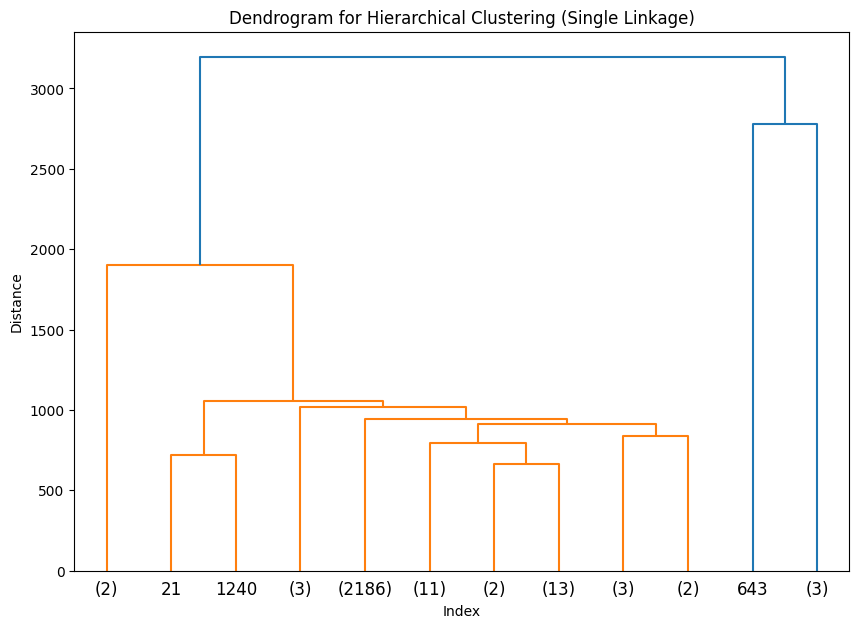

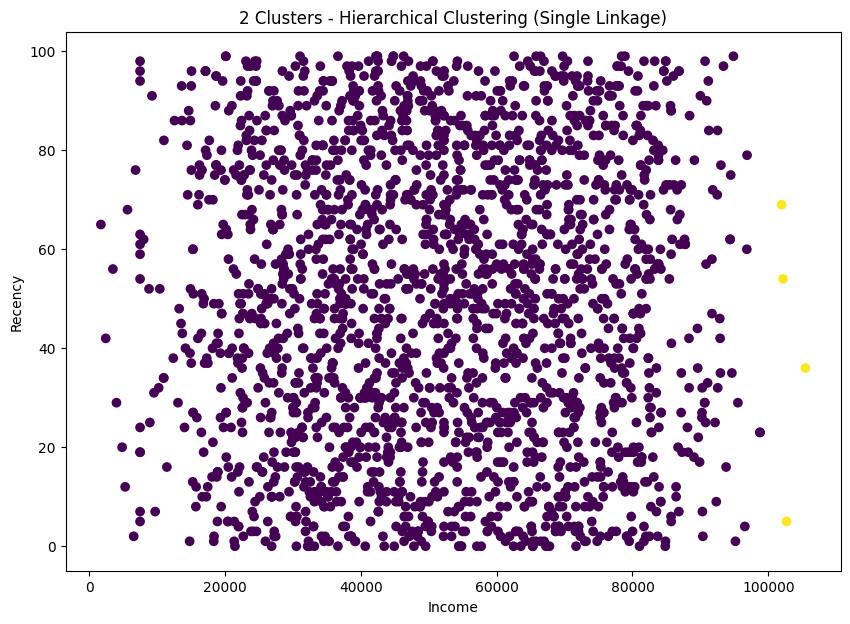

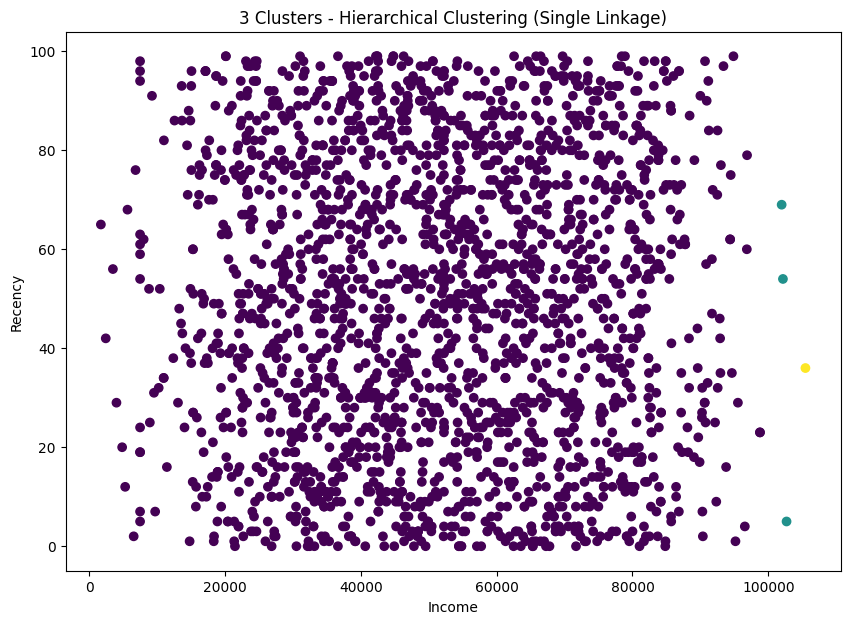

Silhouette Score для 2 кластерів: 0.45158000123704284
Silhouette Score для 3 кластерів: 0.4410713519050823


In [56]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

# Вибір колонок для кластеризації на очищених даних
X_cleaned = df_cleaned[['Income', 'Recency', 'NumWebPurchases']]

# Ієрархічна агломеративна кластеризація з single linkage
Z = sch.linkage(X_cleaned, method='single')

# Візуалізація дендрограми
plt.figure(figsize=(10, 7))
sch.dendrogram(Z, truncate_mode='lastp', p=12)  # Обмежуємо кількість кластерів
plt.title('Dendrogram for Hierarchical Clustering (Single Linkage)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# Створення плоских кластерів з fcluster для 2 і 3 кластерів
clusters_2 = sch.fcluster(Z, t=2, criterion='maxclust')
clusters_3 = sch.fcluster(Z, t=3, criterion='maxclust')

# Візуалізація для 2 кластерів
plt.figure(figsize=(10, 7))
plt.scatter(X_cleaned['Income'], X_cleaned['Recency'], c=clusters_2, cmap='viridis')
plt.title('2 Clusters - Hierarchical Clustering (Single Linkage)')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.show()

# Візуалізація для 3 кластерів
plt.figure(figsize=(10, 7))
plt.scatter(X_cleaned['Income'], X_cleaned['Recency'], c=clusters_3, cmap='viridis')
plt.title('3 Clusters - Hierarchical Clustering (Single Linkage)')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.show()

# Обчислення сили метрики для кожної з кластеризацій
silhouette_score_2 = silhouette_score(X_cleaned, clusters_2)
silhouette_score_3 = silhouette_score(X_cleaned, clusters_3)

print(f"Silhouette Score для 2 кластерів: {silhouette_score_2}")
print(f"Silhouette Score для 3 кластерів: {silhouette_score_3}")

Значення Silhouette Score для 2 кластерів (0.45) трохи вище, ніж для 3 кластерів (0.44), що свідчить про те, що кластеризація з 2 кластерами є дещо більш чіткою в контексті розподілу клієнтів, ніж з 3 кластерами. Однак, значення силуетної метрики для обох варіантів кластеризації не є дуже високими, що вказує на можливі проблеми з чітким розподілом клієнтів по кластерах.

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

Silhouette Score для DBSCAN кластеризації: 0.2679407415496949


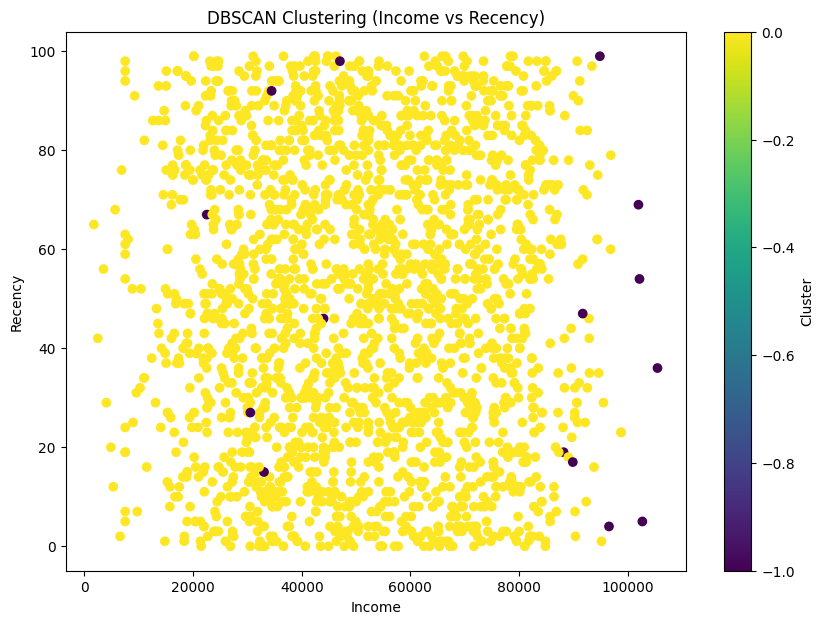

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Вибір колонок для кластеризації
X_cleaned = df_cleaned[['Income', 'Recency', 'NumWebPurchases']]

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Створюємо модель кластеризації DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Параметри можна налаштувати
df_cleaned['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Обчислюємо силуетну метрику для DBSCAN
# Силуетна метрика вимагає, щоб у нас було більше ніж 1 кластер (класифікація -1 позначає шум)
silhouette_avg_dbscan = silhouette_score(X_scaled, df_cleaned['Cluster_DBSCAN'])
print(f"Silhouette Score для DBSCAN кластеризації: {silhouette_avg_dbscan}")

# Візуалізація результатів кластеризації DBSCAN
plt.figure(figsize=(10, 7))
plt.scatter(df_cleaned['Income'], df_cleaned['Recency'], c=df_cleaned['Cluster_DBSCAN'], cmap='viridis')
plt.title('DBSCAN Clustering (Income vs Recency)')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.colorbar(label='Cluster')
plt.show()

В даному випадку ні. В ідеалі, потрібно ще поекспериментувати з ознаками, які відбирати для кластеризації. Бо результати незадовільні.